In [8]:
import numpy as np
import pandas as pd

data = {
    'Fruit ID': [1, 2, 3, 4, 5, 6],
    'Weight': [180, 200, 150, 170, 160, 140],
    'Sweetness Level': [7, 6, 4, 5, 6, 3],
    'Label': ['Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange']
}

df = pd.DataFrame(data)


In [9]:
new_fruit = np.array([165, 5.5])

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

def minkowski_distance(point1, point2, p):
    return np.power(np.sum(np.abs(point1 - point2) ** p), 1/p)

distances = []
for index, row in df.iterrows():
    weight = row['Weight']
    sweetness = row['Sweetness Level']
    label = row['Label']
    dist_euclidean = euclidean_distance(new_fruit, np.array([weight, sweetness]))
    dist_manhattan = manhattan_distance(new_fruit, np.array([weight, sweetness]))
    dist_minkowski = minkowski_distance(new_fruit, np.array([weight, sweetness]), p=3)  # Example with p=3
    
    distances.append({
        'Label': label,
        'Euclidean': dist_euclidean,
        'Manhattan': dist_manhattan,
        'Minkowski': dist_minkowski
    })

distances_df = pd.DataFrame(distances)
print(distances_df)


    Label  Euclidean  Manhattan  Minkowski
0   Apple  15.074813       16.5  15.004998
1   Apple  35.003571       35.5  35.000034
2  Orange  15.074813       16.5  15.004998
3  Orange   5.024938        5.5   5.001666
4   Apple   5.024938        5.5   5.001666
5  Orange  25.124689       27.5  25.008331


In [10]:
k = 3

nearest_neighbors = distances_df.nsmallest(k, 'Euclidean')

label_counts = nearest_neighbors['Label'].value_counts()
predicted_label = label_counts.idxmax()
print("Predicted Label:", predicted_label)


Predicted Label: Apple


In [11]:
for k in [1, 3, 5]:
    nearest_neighbors = distances_df.nsmallest(k, 'Euclidean')
    label_counts = nearest_neighbors['Label'].value_counts()
    predicted_label = label_counts.idxmax()
    print(f"Predicted Label for k={k}: {predicted_label}")


Predicted Label for k=1: Orange
Predicted Label for k=3: Apple
Predicted Label for k=5: Orange


In [16]:
def knn_classify(new_point, df, k):
    # Calculate distances
    distances = []
    for index, row in df.iterrows():
        dist = np.linalg.norm(new_point - np.array([row['Weight'], row['Sweetness Level']]))
        distances.append((dist, label_mapping[row['Label']]))  # Store distance and numerical label
    
    distances.sort(key=lambda x: x[0])
    nearest_labels = [label for _, label in distances[:k]]
    
    most_common = max(set(nearest_labels), key=nearest_labels.count)
    return most_common


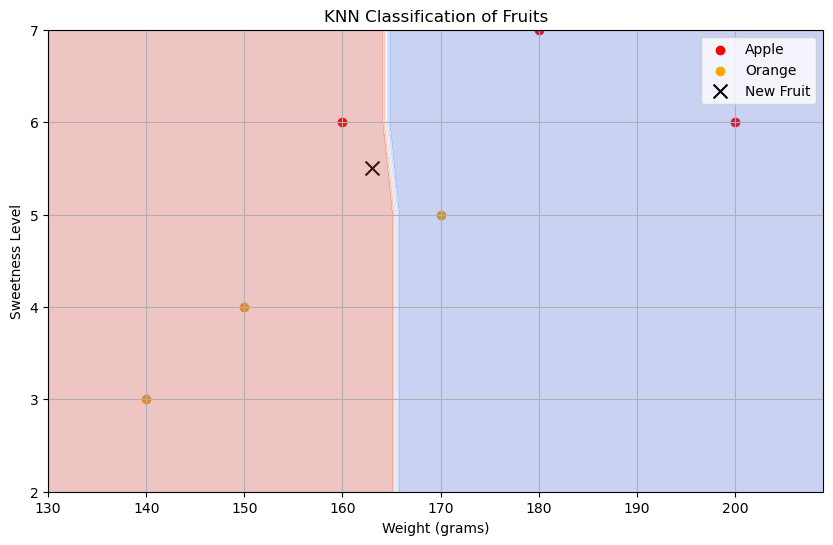

In [19]:
import matplotlib.pyplot as plt
import numpy as np

new_fruit = np.array([163, 5.5])  # changed

label_mapping = {'Apple': 0, 'Orange': 1}
reverse_mapping = {0: 'Apple', 1: 'Orange'}

plt.figure(figsize=(10, 6))

for label, color in zip(['Apple', 'Orange'], ['red', 'orange']):
    subset = df[df['Label'] == label]
    plt.scatter(subset['Weight'], subset['Sweetness Level'], color=color, label=label)

plt.scatter(new_fruit[0], new_fruit[1], color='black', marker='x', s=100, label='New Fruit')

x_min, x_max = df['Weight'].min() - 10, df['Weight'].max() + 10
y_min, y_max = df['Sweetness Level'].min() - 1, df['Sweetness Level'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

Z = []
for i in range(len(xx)):
    for j in range(len(xx[0])):
        label_num = knn_classify(np.array([xx[i][j], yy[i][j]]), df, k=3)
        Z.append(label_num)
Z = np.array(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level')
plt.title('KNN Classification of Fruits')
plt.legend()
plt.grid()
plt.show()


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


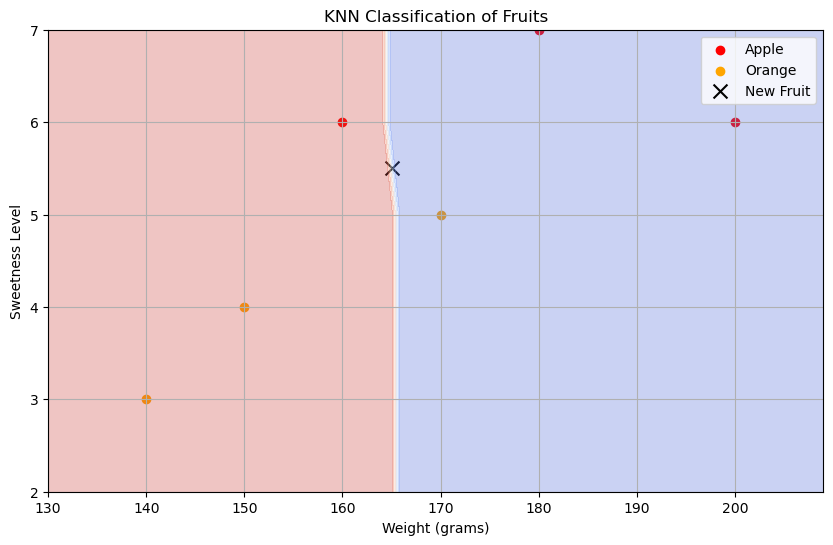

Euclidean distances: [15.07481343 35.00357125 15.07481343  5.02493781  5.02493781 25.12468905]
Manhattan distances: [16.5 35.5 16.5  5.5  5.5 27.5]
Minkowski distances (p=3): [15.00499833 35.00003401 15.00499833  5.00166611  5.00166611 25.00833056]


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import LabelEncoder

data = {
    'Weight': [180, 200, 150, 170, 160, 140],
    'Sweetness Level': [7, 6, 4, 5, 6, 3],
    'Label': ['Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange']
}

df = pd.DataFrame(data)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Label'])

X = df[['Weight', 'Sweetness Level']]

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y_encoded)

plt.figure(figsize=(10, 6))

for label, color in zip(['Apple', 'Orange'], ['red', 'orange']):
    subset = df[df['Label'] == label]
    plt.scatter(subset['Weight'], subset['Sweetness Level'], color=color, label=label)

new_fruit = np.array([[165, 5.5]])
plt.scatter(new_fruit[0][0], new_fruit[0][1], color='black', marker='x', s=100, label='New Fruit')

x_min, x_max = df['Weight'].min() - 10, df['Weight'].max() + 10
y_min, y_max = df['Sweetness Level'].min() - 1, df['Sweetness Level'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level')
plt.title('KNN Classification of Fruits')
plt.legend()
plt.grid()
plt.show()

distances_euclidean = pairwise_distances(new_fruit, X, metric='euclidean')[0]
distances_manhattan = pairwise_distances(new_fruit, X, metric='manhattan')[0]
distances_minkowski = pairwise_distances(new_fruit, X, metric='minkowski', p=3)[0]  # p=3 for Minkowski

print(f'Euclidean distances: {distances_euclidean}')
print(f'Manhattan distances: {distances_manhattan}')
print(f'Minkowski distances (p=3): {distances_minkowski}')


In [23]:
import pandas as pd
import numpy as np
from collections import Counter

# Step 1: Create the dataset
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

df = pd.DataFrame(data)


In [24]:
def entropy(target_col):
    # Calculate the entropy of the target variable
    count = Counter(target_col)
    total_instances = len(target_col)
    ent = 0.0
    for label in count:
        probability = count[label] / total_instances
        ent -= probability * np.log2(probability)
    return ent

# Calculate the entropy for the Diagnosis
entropy_diagnosis = entropy(df['Diagnosis'])
print(f'Entropy of Diagnosis: {entropy_diagnosis:.3f}')


Entropy of Diagnosis: 1.000


In [25]:
def information_gain(data, feature, target):
    # Calculate information gain for a feature
    total_entropy = entropy(data[target])
    
    # Group by the feature
    values = data[feature].unique()
    weighted_entropy = 0.0
    
    for value in values:
        subset = data[data[feature] == value]
        subset_entropy = entropy(subset[target])
        weighted_entropy += (len(subset) / len(data)) * subset_entropy
    
    return total_entropy - weighted_entropy

# Calculate information gain for each feature
features = ['Age', 'Blood Pressure', 'Cholesterol']
info_gains = {feature: information_gain(df, feature, 'Diagnosis') for feature in features}

print("Information Gains:")
for feature, gain in info_gains.items():
    print(f"{feature}: {gain:.3f}")


Information Gains:
Age: 1.000
Blood Pressure: 1.000
Cholesterol: 1.000


In [26]:
# Choose the root node
root_node = max(info_gains, key=info_gains.get)
print(f"Root Node: {root_node}")


Root Node: Age


In [27]:
class Node:
    def __init__(self, feature=None, value=None, left=None, right=None, prediction=None):
        self.feature = feature
        self.value = value
        self.left = left
        self.right = right
        self.prediction = prediction

def build_tree(data, target):
    # If all target values are the same, return a leaf node
    if len(set(data[target])) == 1:
        return Node(prediction=data[target].values[0])
    
    if len(data) == 0:
        return None
    
    # Select the best feature for splitting
    feature_gains = {feature: information_gain(data, feature, target) for feature in features}
    best_feature = max(feature_gains, key=feature_gains.get)
    
    # Create a new tree node
    root = Node(feature=best_feature)
    
    # Split the dataset on the best feature
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        child_node = build_tree(subset, target)
        if best_feature == root.feature:
            if root.left is None:
                root.left = child_node
            else:
                root.right = child_node
            
    return root

# Build the decision tree
decision_tree = build_tree(df, 'Diagnosis')


In [28]:
def predict(tree, instance):
    if tree.prediction is not None:
        return tree.prediction
    
    feature_value = instance[tree.feature]
    
    if feature_value == tree.value:
        return predict(tree.left, instance)
    else:
        return predict(tree.right, instance)

# Example prediction
new_patient = {'Age': 50, 'Blood Pressure': 'Low', 'Cholesterol': 'Normal'}
diagnosis = predict(decision_tree, new_patient)
print(f'Prediction for the new patient: {diagnosis}')


Prediction for the new patient: Sick


In [29]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prepare the same dataset as before
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

df = pd.DataFrame(data)

# Convert categorical variables into numerical
df['Blood Pressure'] = df['Blood Pressure'].map({'High': 1, 'Low': 0})
df['Cholesterol'] = df['Cholesterol'].map({'High': 1, 'Normal': 0})
df['Diagnosis'] = df['Diagnosis'].map({'Sick': 1, 'Healthy': 0})

# Features and labels
X = df[['Age', 'Blood Pressure', 'Cholesterol']]
y = df['Diagnosis']


In [30]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prepare the same dataset as before
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

df = pd.DataFrame(data)

# Convert categorical variables into numerical
df['Blood Pressure'] = df['Blood Pressure'].map({'High': 1, 'Low': 0})
df['Cholesterol'] = df['Cholesterol'].map({'High': 1, 'Normal': 0})
df['Diagnosis'] = df['Diagnosis'].map({'Sick': 1, 'Healthy': 0})

# Features and labels
X = df[['Age', 'Blood Pressure', 'Cholesterol']]
y = df['Diagnosis']


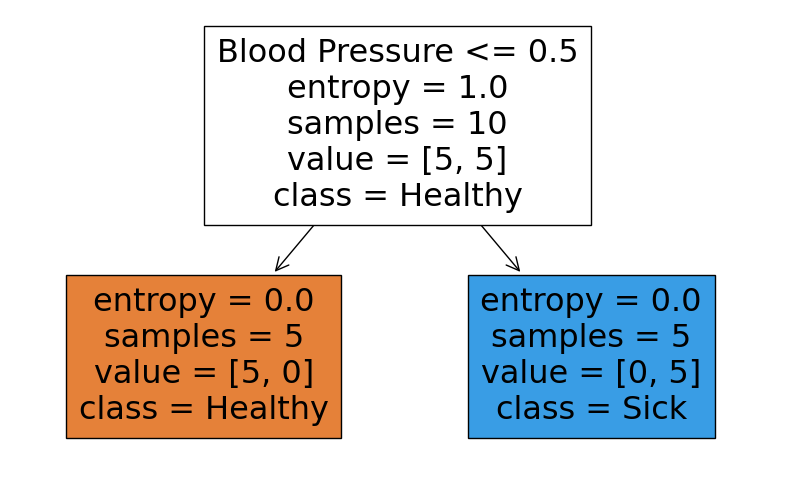

In [31]:
# Initialize and fit the model
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

# Visualize the tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Healthy', 'Sick'], filled=True)
plt.show()


In [33]:
new_patient = np.array([[50, 0, 0]])  # Age: 50, Blood Pressure: Low (0), Cholesterol: Normal (0)
prediction = clf.predict(new_patient)
diagnosis = 'Healthy' if prediction[0] == 0 else 'Sick'
print(f'Prediction for the new patient: {diagnosis}')


Prediction for the new patient: Healthy


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
